<Figure size 1200x600 with 0 Axes>

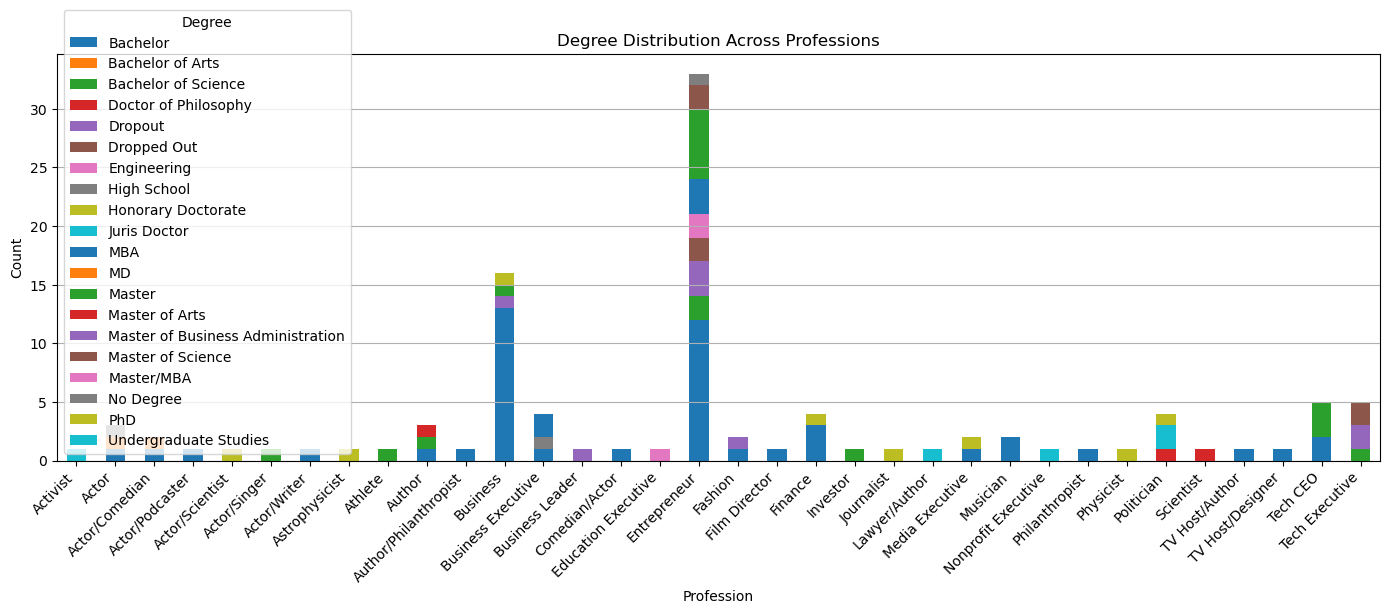

🔹 Top 10 Degree-Profession Combinations:

Profession      Degree                           
Business        Bachelor                             13
Entrepreneur    Bachelor                             12
                Master                                6
Tech CEO        Master                                3
Entrepreneur    MBA                                   3
                Dropout                               3
                Engineering                           2
Tech Executive  Master of Business Administration     2
Tech CEO        Bachelor                              2
Politician      Juris Doctor                          2
dtype: int64


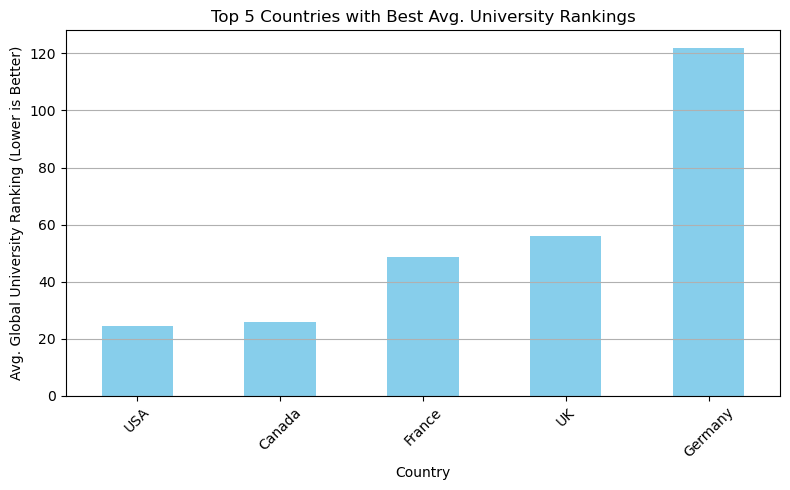


🔹 Top 5 Countries with Best Avg. University Rankings:

Country
USA         24.316667
Canada      26.000000
France      48.750000
UK          56.000000
Germany    122.000000
Name: University Global Ranking, dtype: float64


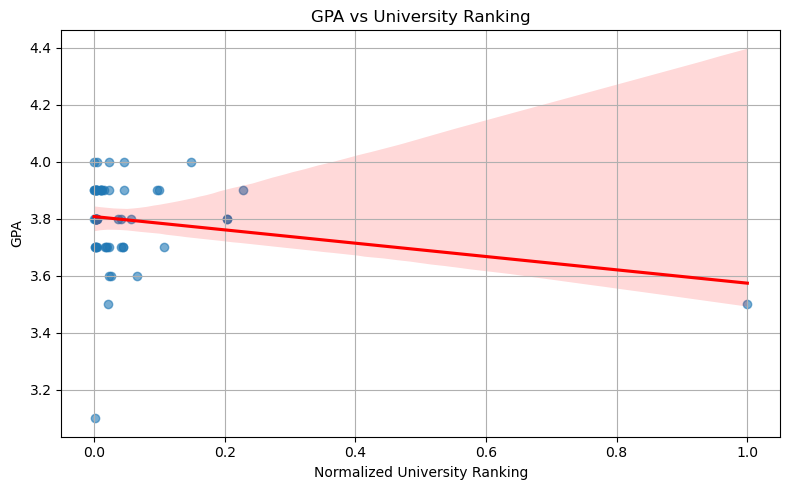


🔹 Correlation between GPA and Normalized University Ranking: -0.2111


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("successful_educations.csv")

# Clean and preprocess
df['University Global Ranking'] = pd.to_numeric(df['University Global Ranking'], errors='coerce')
df['GPA (or Equivalent)'] = pd.to_numeric(df['GPA (or Equivalent)'], errors='coerce')
df.dropna(subset=['Degree', 'Profession', 'Country'], inplace=True)

# Objective 1: Degree Distribution Across Professions
plt.figure(figsize=(12, 6))
degree_prof = df.groupby(['Profession', 'Degree']).size().unstack(fill_value=0)
degree_prof.plot(kind='bar', stacked=True, figsize=(14, 6), legend=True)
plt.title('Degree Distribution Across Professions')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Print top 10 degree-profession combinations
degree_distribution = df.groupby(['Profession', 'Degree']).size().sort_values(ascending=False).head(10)
print("🔹 Top 10 Degree-Profession Combinations:\n")
print(degree_distribution)

# Objective 2: Top Countries with Best Average University Rankings
country_rank = df.dropna(subset=['University Global Ranking'])
top_countries = country_rank.groupby('Country')['University Global Ranking'].mean().sort_values().head(5)
plt.figure(figsize=(8, 5))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Best Avg. University Rankings')
plt.ylabel('Avg. Global University Ranking (Lower is Better)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Print average rankings
print("\n🔹 Top 5 Countries with Best Avg. University Rankings:\n")
print(top_countries)

# Objective 3: GPA vs University Ranking (Normalized)
scatter_df = df.dropna(subset=['University Global Ranking', 'GPA (or Equivalent)']).copy()
scaler = MinMaxScaler()
scatter_df['Normalized Rank'] = scaler.fit_transform(scatter_df[['University Global Ranking']])
plt.figure(figsize=(8, 5))
sns.regplot(data=scatter_df, x='Normalized Rank', y='GPA (or Equivalent)', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('GPA vs University Ranking')
plt.xlabel('Normalized University Ranking')
plt.ylabel('GPA')
plt.tight_layout()
plt.grid(True)
plt.show()

# Print correlation value
correlation = scatter_df['Normalized Rank'].corr(scatter_df['GPA (or Equivalent)'])
print(f"\n🔹 Correlation between GPA and Normalized University Ranking: {correlation:.4f}")
